# Setup

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import anndata as ad
import scrnatools as rna
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

In [3]:
# Setup figure params
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = "Arial"
sc.set_figure_params(dpi=80, dpi_save=300, facecolor="white", frameon=False)
sns.set_context("paper")
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.grid"] = False

In [4]:
warnings.resetwarnings()

## Set up file paths

### demeter

In [5]:
rawDataPath = "/mnt/iacchus/joe/raw_data/"
processedDataPath = "/mnt/iacchus/joe/processed_data/"

### gardner-lab-computer

In [6]:
# rawDataPath = "/mnt/e/Archive/Joe/raw_data/"
# processedDataPath = "/mnt/e/Archive/Joe/processed_data/"

## Import data

In [7]:
aire = sc.read(f"{processedDataPath}/Fezf2_thymus_paper/h5ad_files/pairwise_processing/aire_TECs.h5ad")
fezf2 = sc.read(f"{processedDataPath}/Fezf2_thymus_paper/h5ad_files/pairwise_processing/fezf2_TECs.h5ad")

# Differential Density

## Fezf2 KO

In [8]:
fezf2 = rna.tl.log_density_ratio(
    fezf2,
    group_by="genotype",
    groups=["WT", "Fezf2_KO"],
    key_added="Fezf2_KO/WT_genotype_density",
    latent_rep="X_umap",
)

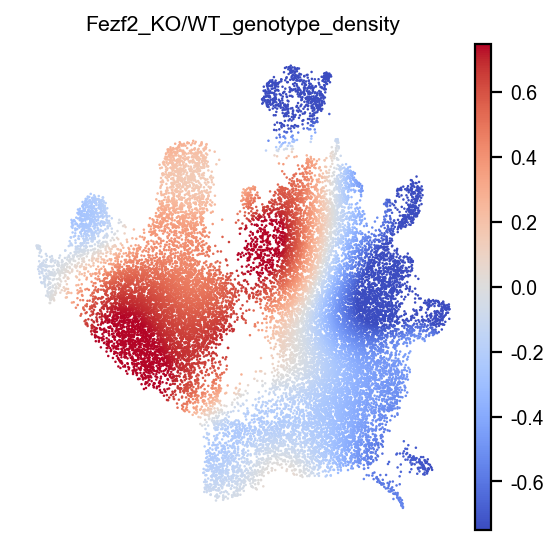

In [9]:
sc.settings.figdir = "../../analysis/paper_figures/S1/"
sc.pl.umap(
    fezf2,
    color="Fezf2_KO/WT_genotype_density",
    cmap="coolwarm",
    vmin=-0.75,
    vmax=0.75,
    save="_S1H_Fezf2_KO_density.pdf"
)

## Aire KO

In [10]:
aire = rna.tl.log_density_ratio(
    aire,
    group_by="genotype",
    groups=["WT", "Aire_KO"],
    key_added="Aire_KO/WT_genotype_density",
    latent_rep="X_umap",
)

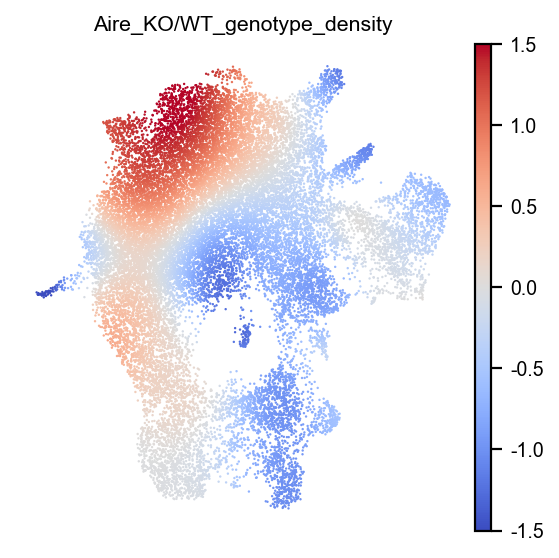

In [11]:
sc.settings.figdir = "../../analysis/paper_figures/S1/"
sc.pl.umap(
    aire,
    color="Aire_KO/WT_genotype_density",
    cmap="coolwarm",
    vmin=-1.5,
    vmax=1.5,
    save="_S1H_Aire_KO_density.pdf"
)